# WordCloud

In [1]:
!pip install konlpy
import re
import konlpy
import pandas as pd

     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 448 kB 59.7 MB/s 


In [6]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [8]:
#'과제_뉴스 기사' 텍스트 불러오고 string으로 읽기
with open('/content/drive/MyDrive/과제_뉴스 기사.txt', encoding='utf-8') as f:  #본인 디렉토리에 맞게 설정해주세요!
    text = f.readlines()
    

In [9]:
text_strip = [i.strip() for i in text if i != '\n']
text_join = ' '.join(text_strip)
#빈 줄과 양 끝단의 공백 제거
p = re.compile(r'\bclass\b')
filtered_content = re.sub(r'[^\d\s\w]', ' ', text_join)
#원하는 형태소 분석기로 pos 태깅, morphs, 그리고 명사만 모아놓은 변수 만들어보기
okt = konlpy.tag.Okt()
okt_pos = okt.pos(filtered_content)

komoran = konlpy.tag.Komoran()
komoran.morphs(filtered_content)

komoran_nouns = komoran.nouns(filtered_content)

#이메일, 날짜 등 불용어 제거
from nltk.corpus import stopwords
stop_words = ['이오', '에다', '하오', '마오'] #한국어로 할 때는 직접 설정.
unique_Noun_words = set(komoran_nouns)
for word in unique_Noun_words:
    if word in stop_words or len(word) == 1:  #한 글자짜리 단어는 알아보기 어려워서 제거.
        while word in komoran_nouns:
            komoran_nouns.remove(word)

#Counter 모듈로 빈도 분석
from collections import Counter
c = Counter(komoran_nouns)
c

Counter({'6월': 3,
         '가계': 4,
         '가중': 1,
         '강화': 1,
         '거래': 2,
         '경신': 1,
         '관계자': 1,
         '관련': 1,
         '규모': 1,
         '규제': 1,
         '금고': 1,
         '금리': 17,
         '금융': 1,
         '금지': 1,
         '기관': 1,
         '기록': 2,
         '기자': 1,
         '기준': 2,
         '기후': 1,
         '늦기 전에': 1,
         '담보': 1,
         '대기': 1,
         '대로': 1,
         '대비': 3,
         '대책': 1,
         '대출': 15,
         '대출금': 1,
         '때문': 2,
         '리도': 1,
         '만원': 1,
         '매매': 1,
         '무단': 1,
         '발표': 1,
         '배포': 1,
         '보관': 1,
         '부동산': 2,
         '비율': 2,
         '사람': 2,
         '사상': 4,
         '사자': 1,
         '사태': 1,
         '상품': 1,
         '설명': 1,
         '속도': 1,
         '수단': 1,
         '수요': 1,
         '수준': 2,
         '시대': 2,
         '시장': 1,
         '신용': 7,
         '신용거래': 1,
         '신용등급': 1,
         '안전': 1,
         '얘기': 2,
         '역대': 5

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

## 한글폰트 다운로드
나눔 폰트를 다운 받고 font_path를 저장해주세요. 이후 plt.rc를 활용해 폰트를 지정해주세요.

In [11]:
import matplotlib.font_manager as fm
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [13]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [15]:
nanum_font

['/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/t

In [16]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic


## 워드클라우드 시각화
단어별 빈도분석이 저장된 c 라는 객체를 WordCloud 시각화해주세요.

Hint: 
<br>wordcloud = WordCloud(~~~)
<br>wordcloud.generate_from_frequencies(c)
<br>wordcloud.to_image()
<br>잘 모르시겠으면 Notion에 업로드된 텍스트 마이닝의 워드클라우드 강의를 참고해주세요.

In [19]:
!pip install wordcloud
frequent = c.most_common(20)
print(frequent)
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf'

[('금리', 17), ('대출', 15), ('은행', 7), ('신용', 7), ('최저', 5), ('역대', 5), ('사상', 4), ('예금', 4), ('평균', 4), ('가계', 4), ('증가', 4), ('주식', 3), ('6월', 3), ('전월', 3), ('대비', 3), ('주택', 3), ('시대', 2), ('얘기', 2), ('기록', 2), ('부동산', 2)]


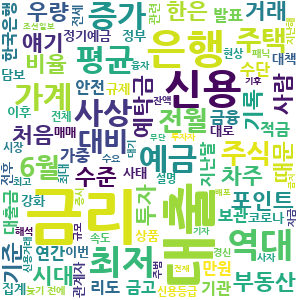

In [20]:
wordcloud = WordCloud(
    max_font_size=60, 
    width=300,
    height=300,
    relative_scaling='auto', 
    font_path=FONT_PATH, 
    background_color='white')
wordcloud.generate_from_frequencies(c) 
wordcloud.to_image()

# Bike Sharing Demand

출처: https://www.kaggle.com/c/bike-sharing-demand/data?select=train.csv

## Load Dataset

첨부된 train 데이터를 불러와주세요.

In [25]:
train = pd.read_csv('/content/drive/MyDrive/train.csv', parse_dates=["datetime"])

## 전처리
datetime의 data를 연/월/일/시간/분/초/요일로 쪼개서 새로운 컬럼에 담아주세요.
전처리 하고 나면 연 컬럼, 월 컬럼부터 초 컬럼, 요일 컬럼까지 총 7개의 컬럼이 추가 되어야합니다.
<br>Hint:파이썬에 내장된 .dt 함수를 활용해주세요.

In [37]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month         
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['Weekday'] = train['datetime'].dt.strftime("%A")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,Weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,Saturday


datetime의 요일 컬럼을 사람이 알아보기 쉽게 Monday~Sunday로 바꿔주세요.
dt 함수를 사용하셨다면 다음과 같이 바꾸시면 됩니다.
<br> 0 = Monday
<br> 1 = Tuesday
<br> 2 = Wednesday
<br> 3 = Thursday
<br> 4 = Friday
<br> 5 = Saturday
<br> 6 = Sunday

## 시각화



### 1)
연도별 자전거 대여량과 월별 자전거 대여량을 시각화 해주세요.

이후 각 시각화한 plot에서 각자 인사이트를 도출해주세요.

<br> 힌트: barchart, 계절

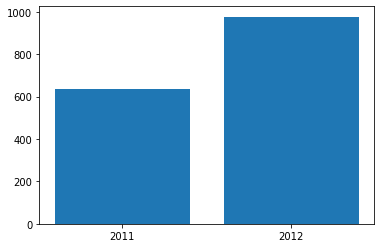

In [47]:
plt.bar(data=train, x='year',height='count')
plt.xticks([2011,2012])
plt.show()

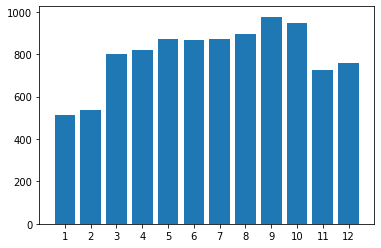

In [48]:
plt.bar(data=train, x='month',height='count')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

2011년에 비해 2012년에서의 자전거 대여수가 증가한 것을 볼 수 있다. 또한, 월별 자전거 대여량 그래프를 보았을 때, 자전거 이용하기 좋은 날씨대를 가지고 있는 봄에 자전거 대여량이 늘어나고 가을에 자전거 대여량이 최대치를 기록하는 것을 볼 수 있다.

###2)
연컬럼과 월컬럼을 합쳐주세요. 이후 2011년 1월부터 2012년 12월까지 월별 자전거 대여량을 시각화 해주세요. 

이전에 시각화한 월별 자전거 대여량 시각화 차트에서, 어째서 1월과 12월의 자전거 대여량의 차이가 크게 났는지 설명해주세요.

In [54]:
train = train.astype({'year':'str', 'month': 'str'})
train['year_month']= train['year'] + " "+ train['month'] 

In [55]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,Weekday,year_month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,Saturday,2011 1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,Saturday,2011 1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,Saturday,2011 1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,Saturday,2011 1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,Saturday,2011 1


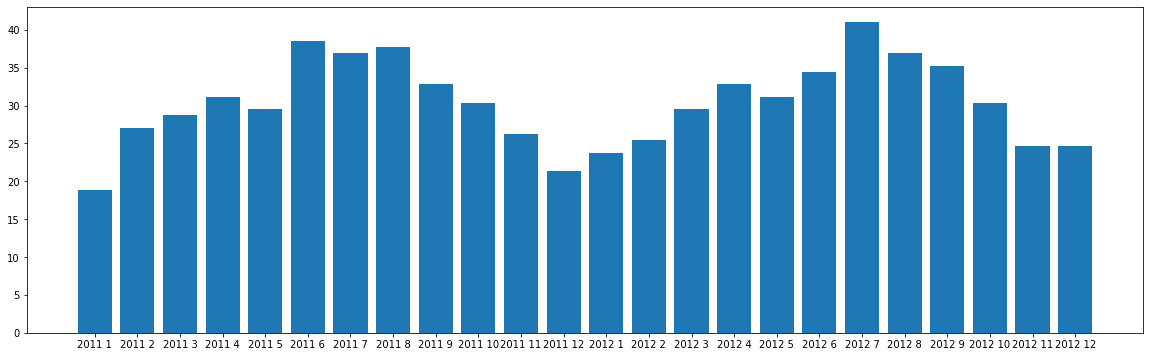

In [59]:
plt.figure(figsize=(20, 6))
plt.bar(data=train, x='year_month',height='count')
plt.show()

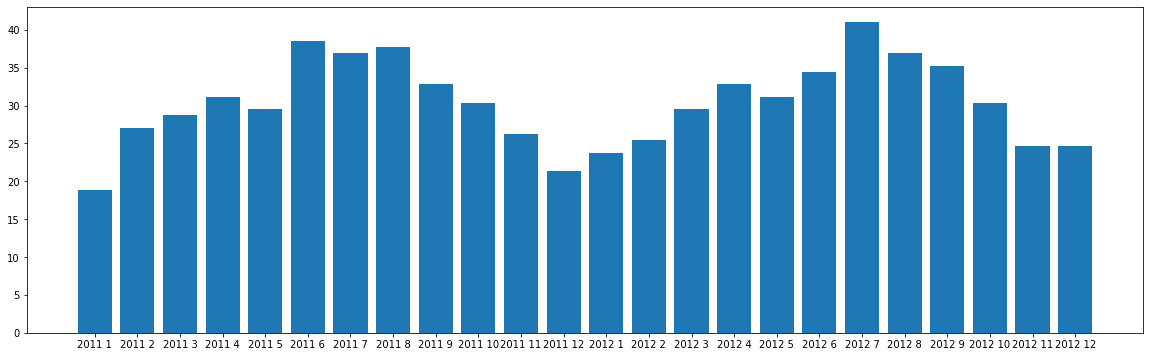

In [60]:
plt.figure(figsize=(20, 6))
plt.bar(data=train, x='year_month',height='temp')
plt.show()

12월의 평균 온도가 1월의 평균 온도에 비해 높음을 알 수 있고 이로 인해 12월과 1월 간의 자전거 대여량 차이가 발생했다고 볼 수 있다.

###3)
아래의 정보가 나타나게 시각화 해주세요.
<br>1) 시간별 자전거 대여량
<br>2) 근무일/휴일에 따른 시간별 자전거 대여량
<br>3) 요일에 따른 시간별 자전거 대여량

이 플랏에서 인사이트를 도출해주세요.

Hint: pointplot, hue

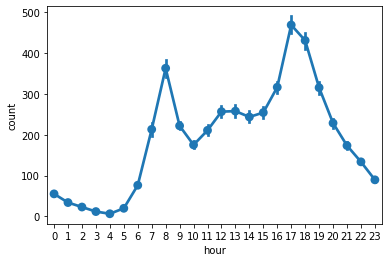

In [71]:
sns.pointplot(data = train, x = 'hour', y= 'count')
plt.show()

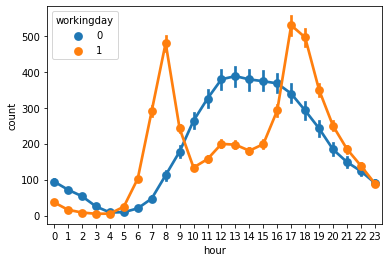

In [72]:
sns.pointplot(data = train, x = 'hour', y= 'count', hue = 'workingday')
plt.show()

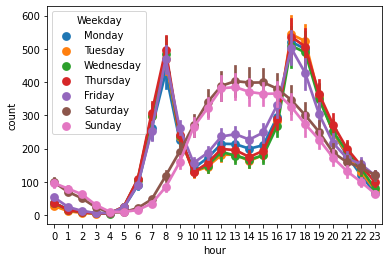

In [73]:
dayofweek = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.pointplot(data = train, x = 'hour', y= 'count', hue = 'Weekday', hue_order = dayofweek)
plt.show()

1. 시간대별 그래프를 통해 보았을 때, 출퇴근 시간대에 자전거 대여량이 높은 것을 확인할 수 있다.
2. 출퇴근 시간대에 자전거 대여량이 많은 것은 근무일 자전거 대여량이 영향을 크게 준 것을 확인할 수 있다. 또한, 날씨가 따뜻한 낮시간대부터 초저녁 시간대까지의 자전거 대여량은 휴일날의 자전거 대여량이 큰 영향을 주었다고 볼 수 있다.
3. 요일별로도 확인해보았을 때, 앞선 언급한 결론을 요일별로 비슷하게 따라가는 것을 볼 수 있다.

# mpg


## Load Dataset
seaborn을 이용해 'mpg'데이터셋을 불러와주세요.

In [74]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 시각화

model_year과 mpg 데이터 값을 산점도로 보여주고, 그 간의 선형관계를 선으로 보여주세요.
<br> Hint: regplot

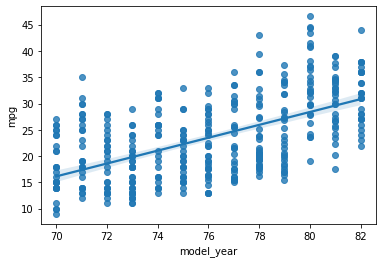

In [76]:
sns.regplot(x= 'model_year', 
            y= 'mpg',
            data = mpg)

너무너무 고생 많으셨습니다!! 시각화 세션 화이팅하세요ㅎㅎㅎ
